/home/pku/zhaoyz/anaconda3/envs/HWW/lib/python3.8/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


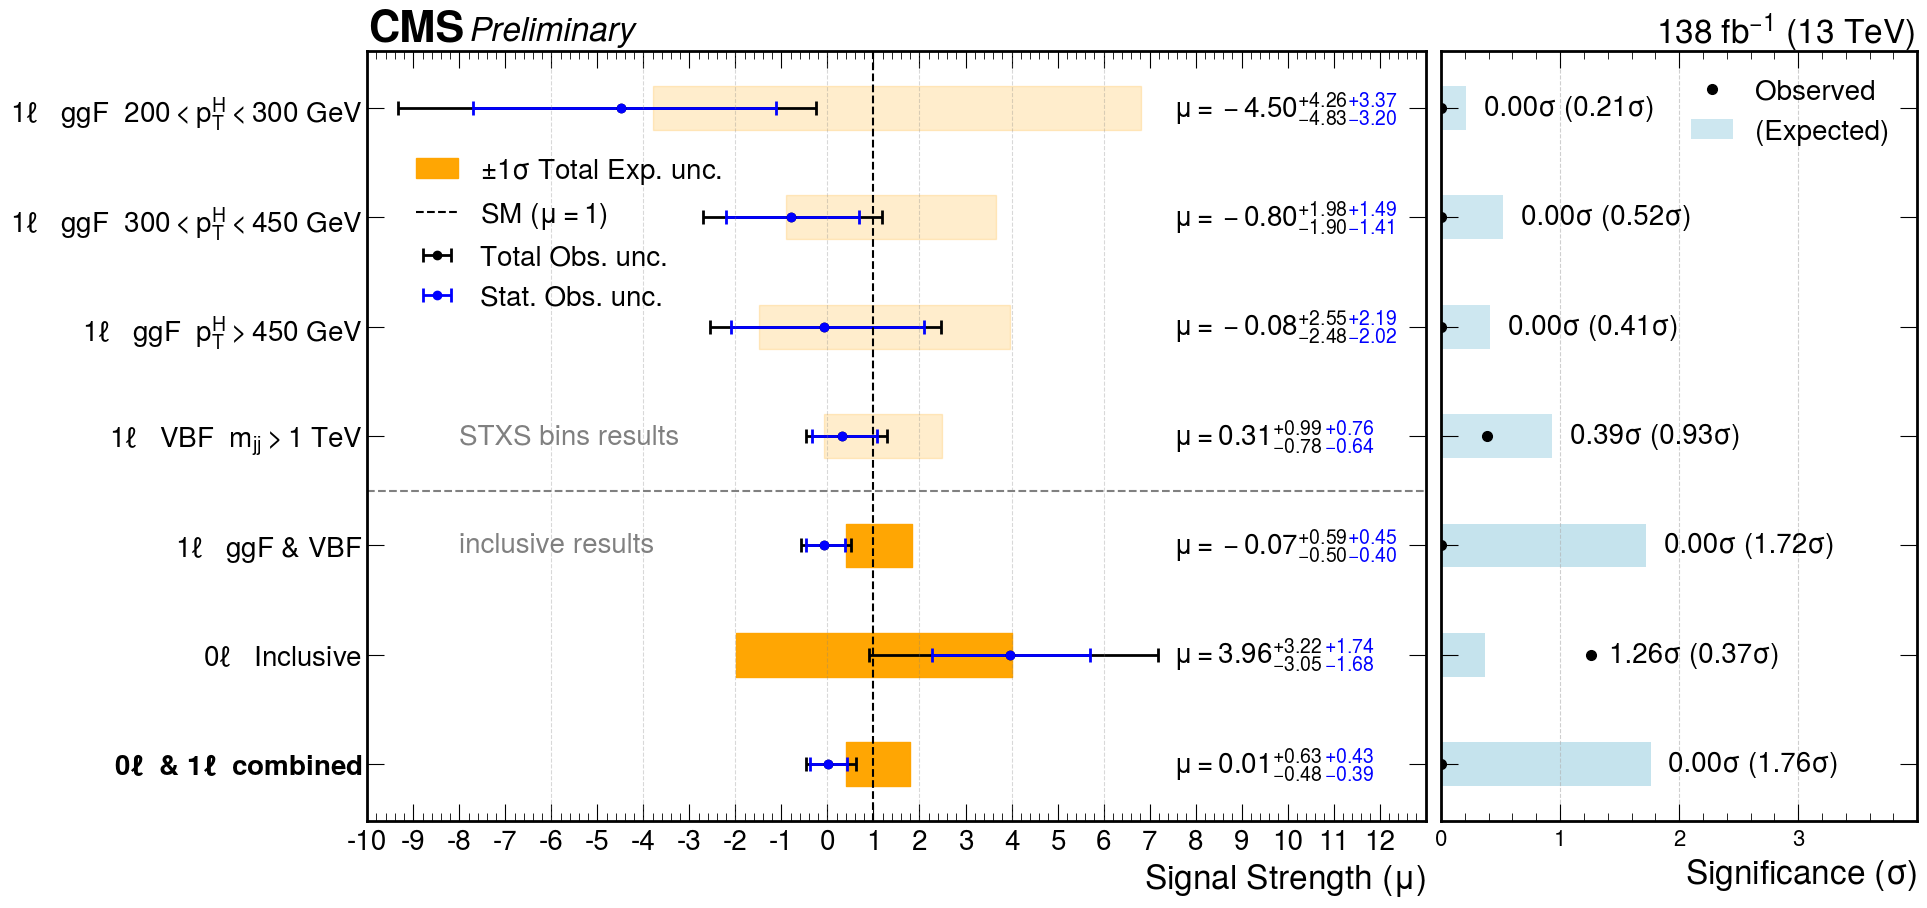

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep

# 应用CMS样式
hep.style.use("CMS")
plt.rcParams['font.family'] = 'sans-serif'

# ================= 数据配置 =================
# 调整后的通道顺序 (前四个是分bin通道，最后是combination)
channels = [
    '1$\ell$   ggF  $200<p_T^H<300$ GeV', 
    '1$\ell$   ggF  $300<p_T^H<450$ GeV',
    '1$\ell$   ggF  $p_T^H>450$ GeV', 
    
    
    '1$\ell$   VBF  $m_{jj}>1$ TeV',
    '1$\ell$   ggF & VBF',
    '0$\ell$   Inclusive',
    r'$\mathbf{0\ell}$  $\mathbf{&}$ $\mathbf{1\ell}$  $\mathbf{combined}$'
]

# 调整所有数据数组顺序与新channels顺序一致
observed_mu         = [-4.496,-0.800,-0.081,   0.311, -0.070, 3.964, 0.005]
observed_upper_total= [4.256, 1.976, 2.550,    0.988, 0.591,  3.218, 0.626]
observed_lower_total= [4.829, 1.902, 2.478,    0.779, 0.496,  3.054, 0.478]
observed_upper_stat = [3.371, 1.490, 2.185,    0.760, 0.447,  1.735, 0.430]
observed_lower_stat = [3.202, 1.413, 2.024,    0.636, 0.398,  1.684, 0.390]
expected_upper      = [5.810, 2.673, 2.967,    1.495, 0.841,  3.001, 0.786]
expected_lower      = [4.794, 1.904, 2.498,    1.066, 0.605,  2.990, 0.591]
expected_sig        = [0.212, 0.5199,0.4138,   0.933, 1.720,  0.37,  1.760]
observed_sig        = [0.0,   0.0,   0.0,      0.386, 0.00,   1.26,  0.00]

# ================= 绘图配置 =================
y_pos = np.array([6,5,4,3,2,1,0])  # 与channels顺序一致
band_thickness = 0.4
split_line_pos = 2  # 分割线位置

# 创建画布
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20, 10), 
                            gridspec_kw={'width_ratios': [2, 0.9], 'wspace': 0.02}, 
                            sharey=True)

# ================= 左侧信号强度图 =================
# 绘制预期带
for i in range(len(channels)):
    alpha = 0.2 if i < 4 else 0.99  # 前四个通道更透明
    ax.fill_betweenx(
        [y_pos[i] - band_thickness/2, y_pos[i] + band_thickness/2],
        1 - expected_lower[i], 1 + expected_upper[i],
        color='orange', alpha=alpha,
        label='$\pm1\sigma$ Total Exp. unc.' if i == 5 else ""
    )

# 绘制组合通道加粗边框
# combination_idx = 6
# ax.fill_betweenx(
#     [y_pos[combination_idx] - band_thickness/2*1.2, 
#      y_pos[combination_idx] + band_thickness/2*1.2],
#     1 - expected_lower[combination_idx], 1 + expected_upper[combination_idx],
#     color='orange', alpha=0.4, edgecolor='darkorange', linewidth=2
# )

# 绘制误差条
xerr_total = np.array([observed_lower_total, observed_upper_total])
ax.errorbar(
    observed_mu, y_pos, xerr=xerr_total,
    fmt='o', color='black', capsize=5, capthick=2, elinewidth=2,
    label='Total Obs. unc.'
)

xerr_stat = np.array([observed_lower_stat, observed_upper_stat])
ax.errorbar(
    observed_mu, y_pos, xerr=xerr_stat,
    fmt='o', color='blue', capsize=5, capthick=2, elinewidth=2,
    label='Stat. Obs. unc.'
)

# 添加参考线
ax.axvline(x=1, color='black', linestyle='--', label='SM ($\mu=1$)')
for x in [-6, -4, -2, 0, 2, 4, 6]:
    ax.axvline(x=x, color='gray', linestyle='--', alpha=0.3, linewidth=0.8)

# 添加分割线
ax.axhline(y=split_line_pos+0.5, color='gray', linestyle='--', linewidth=1.5)
# ax.axhline(y=-0.5, color='gray', linestyle='-', linewidth=1.5)

# 添加数值标签
for i in range(len(channels)):
    # 总不确定度标签
    text_total = r"$\mu = {:.2f}^{{+{:.2f}}}_{{-{:.2f}}}$".format(
        observed_mu[i], observed_upper_total[i], observed_lower_total[i]
    )
    ax.text(7.5, y_pos[i], text_total, va='center', ha='left', fontsize=20)
    
    # 统计不确定度标签
    text_stat = r"$^{{+{:.2f}}}_{{-{:.2f}}}$".format(
        observed_upper_stat[i], observed_lower_stat[i]
    )
    ax.text( len(text_total)/2 - 3.2, y_pos[i], text_stat, va='center', ha='left', fontsize=20, color='blue')

# 坐标轴设置
ax.set_xlabel('Signal Strength ($\mu$)', fontsize=24)
# ax.set_ylabel('Channel', fontsize=16, labelpad=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(channels, fontsize=20)
ax.set_xlim(-10, 13)
ax.set_xticks(np.arange(-10, 13, 1))
ax.tick_params(axis='x', which='major', labelsize=20)

# CMS标注
# hep.cms.label(ax=ax, data=True, llabel='Preliminary', rlabel='138 fb$^{-1}$ (13 TeV)', fontsize=24, loc=0)
hep.cms.label(ax=ax, data=True, llabel='Preliminary', rlabel='', fontsize=24, loc=0)
ax.text( 18, 6.7, "138 fb$^{-1}$ (13 TeV)", va='center', ha='left', fontsize=24, color='black')

# ================= 右侧显著性图 =================
for i in range(len(expected_sig)):
    # 组合通道特殊样式
    # if i == combination_idx:
    #     ax2.barh(y_pos[i], expected_sig[i], 
    #             height=band_thickness*1.3,
    #             color='lightblue', alpha=0.7,
    #             edgecolor='navy', linewidth=2)
    # else:
    ax2.barh(y_pos[i], expected_sig[i], 
            height=band_thickness,
            color='lightblue', alpha=0.6 if i<4 else 0.7,label = "(Expected)" if i == 1 else None)
        
    # 观测值标记
    ax2.plot(observed_sig[i], y_pos[i], 'ko', markersize=7, label ="Observed" if i == 1 else None)
    
    # 数值标签
    sig_text = f"{observed_sig[i]:.2f}σ ({expected_sig[i]:.2f}σ)"
    ax2.text(max(observed_sig[i], expected_sig[i]) + 0.15, y_pos[i],
            sig_text, va='center', ha='left', fontsize=20)

# 显著性图设置
ax2.set_xlabel('Significance ($\sigma$)', fontsize=24)
ax2.set_xlim(0, 4)
ax2.set_xticks(np.arange(0, 4, 1))
ax2.tick_params(axis='x', labelsize=16)
ax2.grid(True, axis='x', linestyle='--', alpha=0.6)

# 添加图例
handles, labels = ax.get_legend_handles_labels()
legend_order = [0, 1, 2,3]  # 调整图例顺序
ax.legend([handles[idx] for idx in legend_order], 
         [labels[idx] for idx in legend_order],
         loc='upper left', frameon=False, 
         fontsize=20, bbox_to_anchor=(0.02, 0.9))
ax2.legend(loc='best', frameon=False, fontsize=20)

ax.text( -8, 3, "STXS bins results", va='center', ha='left', fontsize=20, color='grey')
ax.text( -8, 2, "inclusive results", va='center', ha='left', fontsize=20, color='grey')

# 调整布局
# plt.subplots_adjust(left=0.18, right=0.97, top=0.94, bottom=0.08)

# 保存输出
plt.savefig('./plots/signal_strength_plot_9May.pdf', bbox_inches='tight')
